In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#load the data set using pandas
liver_dataset = pd.read_csv('indian_liver_patient.csv')

In [10]:
liver_dataset.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [11]:
liver_dataset.tail(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
liver_dataset.shape

(583, 11)

# So in this data set there are 583 rows with 10 data columns

In [6]:
liver_dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Explanation Of Data Set By Kaggle
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

Age of the patient
Gender of the patient
Total Bilirubin
Direct Bilirubin
Alkaline Phosphotase
Alamine Aminotransferase
Aspartate Aminotransferase
Total Protiens
Albumin
Albumin and Globulin Ratio
Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [39]:
liver_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [40]:
liver_dataset['Gender'] = liver_dataset['Gender'].map({'Male': 1, 'Female': 2})

In [76]:
liver_dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [41]:
#we will check some statistical measures of the data
liver_dataset.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,1.241796,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## now we will check how many people are having the disease and how many people are not having the disease. In this scenario 2 == Healthy Liver,  1 == Un healthy Liver

In [42]:
liver_dataset.Dataset.value_counts()

1    414
2    165
Name: Dataset, dtype: int64

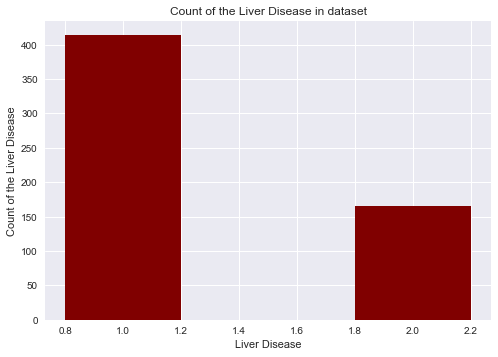

In [43]:
plt.bar([1,2],liver_dataset.Dataset.value_counts() , color ='maroon',
        width = 0.4)
plt.xlabel("Liver Disease")
plt.ylabel("Count of the Liver Disease")
plt.title("Count of the Liver Disease in dataset")
plt.show()

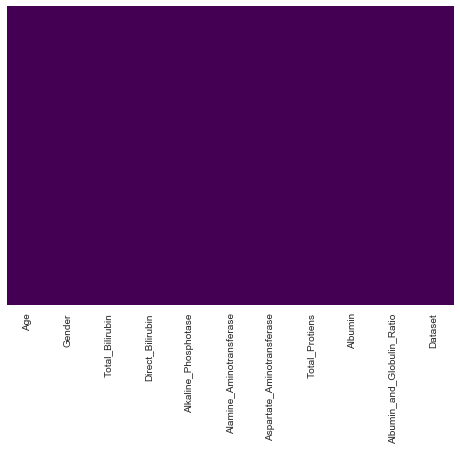

In [44]:
sns.heatmap(liver_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
liver_dataset.dropna(inplace=True)

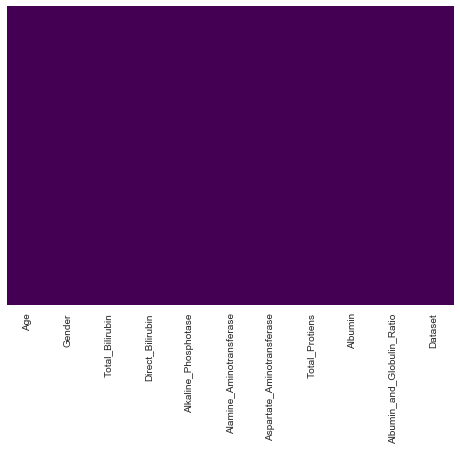

In [46]:
sns.heatmap(liver_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

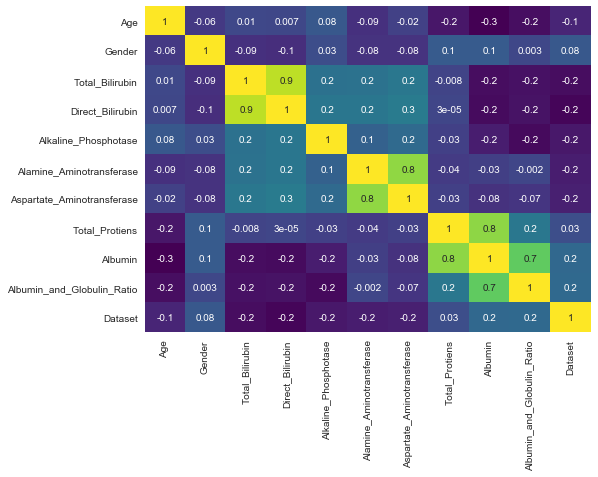

In [47]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(liver_dataset.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

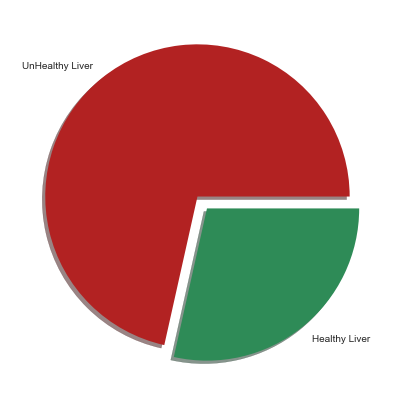

In [48]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=liver_dataset["Dataset"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

In [49]:
X = liver_dataset.drop(columns='Dataset', axis=1)
Y = liver_dataset['Dataset']


In [50]:
X


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [51]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 579, dtype: int64

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [53]:
X_train.shape

(347, 10)

In [54]:
X_test.shape

(232, 10)

In [55]:
X.shape

(579, 10)

# Training the Model Using Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [57]:
model1.fit(X_train, Y_train)

C:\Users\DIVVELA VISHNU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation For Logistic Regression Using Accuracy Score

In [58]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [59]:
print('Accuracy on Training data using Logistic Regression : ', training_data_accuracy*100)

Accuracy on Training data using Logistic Regression :  74.06340057636888


In [60]:
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [61]:
print('Accuracy on Test data using Logistice Regression : ', test_data_accuracy*100)

Accuracy on Test data using Logistice Regression :  68.96551724137932


# Training the Model Using Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Evaluation For Random Forest Classifier Using Accuracy Score

In [64]:
X_train_prediction2 = model2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)

In [65]:
print('Accuracy on Training data using Random Forest Classifier : ', training_data_accuracy2*100)

Accuracy on Training data using Random Forest Classifier :  100.0


In [66]:
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)

In [67]:
print('Accuracy on Test data using Random Forest Classifier : ', test_data_accuracy2*100)

Accuracy on Test data using Random Forest Classifier :  71.98275862068965


# Training the Model using Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model3 = DecisionTreeClassifier(random_state=101)
model3.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

# Model Evaluation For Decision Tree Classifier Using Accuracy Score

In [70]:
X_train_prediction3 = model3.predict(X_train)
training_data_accuracy3 = accuracy_score(X_train_prediction3, Y_train)

In [71]:
print('Accuracy on Training data using Decision Tree Classifier : ', training_data_accuracy3*100)

Accuracy on Training data using Decision Tree Classifier :  100.0


In [72]:
X_test_prediction3 = model3.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)

In [73]:
print('Accuracy on Test data using Decision Tree Classifier : ', test_data_accuracy3*100)

Accuracy on Test data using Decision Tree Classifier :  64.65517241379311


In [75]:
#Creating Data Frame for the accuracy score of logistic regression.

results_df = pd.DataFrame(data=[["Logistic Regression", training_data_accuracy*100, test_data_accuracy*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

#Creating Data Frame for the accuracy score of K-nearest neighbors.

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier",training_data_accuracy2*100 , test_data_accuracy2*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

#Creating Data Frame for the accuracy score of Decision Tree Classifier.

results_df_3 = pd.DataFrame(data=[["Decision Tree Classifier",training_data_accuracy3*100, test_data_accuracy3*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_3, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,74.063401,68.965517
1,Random Forest Classifier,100.000000,71.982759
2,Decision Tree Classifier,100.000000,64.655172


# So by Analysing the above table We can easily guess that Random Forest Classifier is Performing a well Training and Testing accuracy Score. So we will Continue Predicting the new Data with Random Forest Classifier Model.

In [80]:
# Values from a Liver Scan
input_data = (62,2,1.7,140,268,0,0,160,0,3.6)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#predicting data using Random Forest Classifier
prediction = model2.predict(input_data_reshaped)

if (prediction[0]== 2):
  print('According to the given details person does not have a Liver Disease')
else:
  print('According to the given details person has Liver Disease')

According to the given details person has Liver Disease


In [81]:
# Values from a Liver Scan
input_data = (41,1,1,130,204,0,0,172,0,1.4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#predicting data using Random Forest Classifier
prediction = model2.predict(input_data_reshaped)

if (prediction[0]== 2):
  print('According to the given details person does not have a Liver Disease')
else:
  print('According to the given details person has Liver Disease')

According to the given details person has Liver Disease


In [ ]:
# Values from a Liver Scan
input_data = (17,1,0.9,0.3,202,22,19	7.4	4.1	1.20	)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#predicting data using Random Forest Classifier
prediction = model2.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('According to the given details person does not have a Liver Disease')
else:
  print('According to the given details person has Liver Disease')